In [6]:
import hashlib
import numpy as np
import sys 
import random
from matplotlib import pyplot as plt
keys = np.loadtxt('1000_keys.txt')

# EX-1: Universal Hashing

In [7]:
class UniversalHash:
    # class attributes, variables for universal hashing formula
    a = 0
    b = 0
    p = 0
    m = 0
    table = None
    num_ikeys = 0
    
    #Constructor taking prime number list
    def __init__(self, m, prime_list):
        self.p = prime_list[np.random.randint(0, len(prime_list) - 1)] 
        self.m = m
        self.a = np.random.randint(1, self.p)  
        self.b = np.random.randint(0, self.p)  
        self.table = np.ones(m)

    # The universal Hash function (((ak+b) mod p) mode m)
    def hash(self, k):
        return ((self.a * k + self.b) %self.p) % self.m

    def insert_keys(self, keys):
        for k in keys:
            idx = int(self.hash(k))
            self.table[idx] = self.table[idx] + 1
            self.num_ikeys += 1 

    def num_of_collisions(self):
        return np.where(np.array(self.table) > 1)[0].size
    
    def most_occupied_hash(self):
        return np.argmax(self.table)
    

In [8]:
def isprime(n):
    if n<=1:
        return 0
    check=2
    max_req=n
    while check<max_req+1:
        max_req=n/check
        if n%check==0:
            return 0
        check+=1
    return 1


In [20]:
N_sizes = [1000, 10000, 100000, 1000000]
prime_list = [i for i in range(1001,100001) if isprime(i)]

cycles =500
collision_counter=[]
print("-------------< Total Cycles: %d >-----------"%cycles)
print("")
for m in N_sizes:
    col = 0
    for i in range(cycles):
        unihash = UniversalHash(m, prime_list)
        unihash.insert_keys(keys)
        n = unihash.num_of_collisions()
        col += n
    col = col/cycles
    #collision_counter.append((col/m)*100)
    #print (collision_counter[-1])
    print("m = %3d\t"% m, " = %3f\t"% col, "Rate = %3f%%"% ((col/m)*100))



-------------< Total Cycles: 500 >-----------

m = 1000	  = 632.312000	 Rate = 63.231200%
m = 10000	  = 939.808000	 Rate = 9.398080%
m = 100000	  = 976.580000	 Rate = 0.976580%
m = 1000000	  = 977.372000	 Rate = 0.097737%


#### Sorry I am bad at plotting but this graph means percentage of collisions decrease when we increase N size.

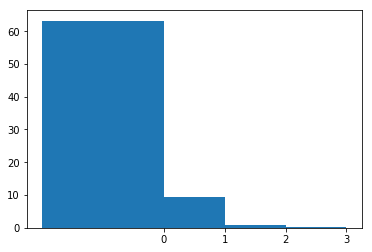

In [19]:
import numpy as np
import matplotlib.pyplot as plt

bar_width = 2. # set this to whatever you want
data = collision_counter
positions = np.arange(4)
plt.bar(positions, data, bar_width)
plt.xticks(positions + bar_width / 2, ('0', '1', '2', '3'))
plt.show()


# EX-2: Word Mapping and Hashing

In [129]:
file_path = 'words.txt'
with open(file_path) as file:
    words = file.read().splitlines()

word1 = [] # sum ASCII
Stupid_Idea = [] # append ASCII

# Populate Hash Array
for i, w in enumerate(words):
    val = 0
    str_val = str()
    for c in w:
        val += ord(c)
        str_val += str(ord(c))
    word1.append(val)
    Stupid_Idea.append(int(str_val))
    

print("-----------------------------------------")
print("ASCII Sum has : min = ", np.min(word1))
print("ASCII Sum has : max = ", np.max(word1))
print("-----------------------------------------")
print("ASCII Append has : min = ", np.min(Stupid_Idea))
print("ASCII Append has : max = ", np.max(Stupid_Idea))


-----------------------------------------
ASCII Sum has : min =  50
ASCII Sum has : max =  4880
-----------------------------------------
ASCII Append has : min =  50
ASCII Append has : max =  1121101011171091111101111171081161149710910599114111115991111121059911510510810599111118111108999711011199111110105111115105115


### My Implementation by Universal Hashing

In [60]:
m = len(word1)
h = UniversalHash(m, prime_list)
h.insert_keys(word1)
n = h.num_of_collisions()
print("Collisions : %3f"% n, "\tRate : %3f%%"% ((n/m)*100))

m = len(Stupid_Idea)
h = UniversalHash(m, prime_list)
h.insert_keys(Stupid_Idea)
n = h.num_of_collisions()
print("Collisions : %3f"% n, "\tRate : %3f%%\n"% ((n/m)*100))


print("Most occupied Hash = ",h.most_occupied_hash())


Collisions : 2330.000000 	Rate : 0.499417%
Collisions : 21067.000000 	Rate : 4.515544%

Most occupied Hash =  14088


### Better Hashing with Built-in Hash of Python

In [126]:
HashTable = [0]*len(word1)

List_of_Hashes=[]
for word in word1:
    List_of_Hashes.append(hash(word))
    HashTable[List_of_Hashes[-1] % len(HashTable)] += 1

collisionCount = 0
highest_collision = 0

for k, hashCount in enumerate(HashTable):
    if(hashCount > 1):
        collisionCount += 1
        if(hashCount > highest_collision):
            highest_collision = hashCount

print("-------------< Integer Word List >-----------\n")
print("Maximum Occupied Hash : %d "%max(List_of_Hashes))
print("Collision Count : %d "%collisionCount)     

-------------< Integer Word List>-----------

Maximum Occupied Hash : 4880 
Collision Count : 2169 


In [127]:
HashTable = [0]*len(Stupid_Idea)

List_of_Hashes=[]
for word in Stupid_Idea:
    List_of_Hashes.append(hash(word))
    HashTable[List_of_Hashes[-1] % len(HashTable)] += 1

collisionCount = 0
highest_collision = 0

for k, hashCount in enumerate(HashTable):
    if(hashCount > 1):
        collisionCount += 1
        if(hashCount > highest_collision):
            highest_collision = hashCount

print("-------------< ASCII Appended Word List >-----------\n")
print("Maximum Occupied Hash : %d "%max(List_of_Hashes))
print("Collision Count : %d "%collisionCount)    

-------------< ASCII Appended Word List >-----------

Maximum Occupied Hash : 2305830310266569484 
Collision Count : 123501 


# EX-3: Handling ridiculous amount of data with probabilistic data structure.

In this presentation Titus Brown a computational scientist emphasize on the growth rate of sequencing capacity. The part of his job is to analyize the DNA sequence. The problem faced by the computation of such a huge amount of yearly data is the space, time and cost of the sequencing which is $10000 to generate 200GB sequencing data of DNA in about a week.

He discussed two approaches which are possible solutions to this problem one of them is shotgun assembly which reassembles fragments but the problem with this approach is that it works for small amount of DNA fragments but for large amount its a memory intensive task. The next one is hadoop but it this technique checks basically which fragments overlaps with other and then keeps looking at all other fragments which overlap which is not a robust solution.

The approach he came up with is the probabilistic data structure approach called Bloom Filter which uses hash functions. He took a hash function and defined it in a bloom filter. He created a number of hash tables of fixed limited size where he hashed the words individually into the tables.The final data structure was a data structure that had false-positive value but no false-negative. One of the important feature of this technique is the false-positive route scales to the logarithmic memory. The outcome of using this algorithm was instead of using 200GB of memory the algorithm maps the data on 68GB RAM which costs only $500 in one week.


# EX-4: Edit Distance Calculation

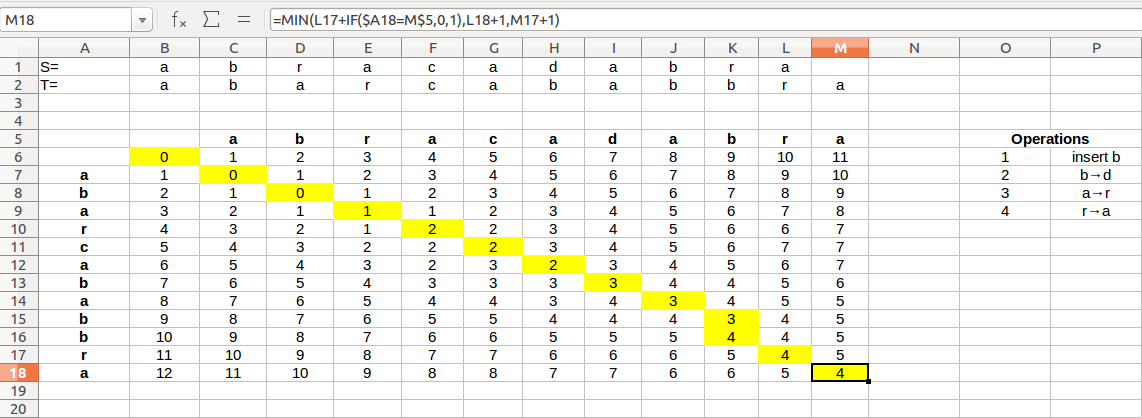

In [92]:
from IPython.display import Image
Image(filename='EditDistance.png')

Note: I used the same formula i.e for cell C7 "=MIN(B6+IF($A7=C$5,0,1),B7+1,C6+1)" which was presented in the lecture slides for calculating edit distance on a spreadsheet software.

# EX-5: KnapSack Problem

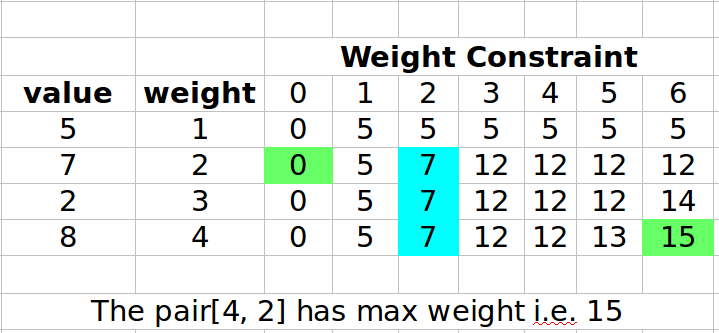

In [42]:
from IPython.display import Image
Image(filename='Knapsack.png')

The knapsack problem is to get the maxmimum benefit from the items that we choose. The word itself originated from from robbing bag of thief. Lets suppose a thief wants to rob a house,he has a knapsack that he can rob maximum of m weight items. There are different items in the house, with different weights and benefits.The goal is to get the maximum benefit or value out of the weight.

Now the solution to this is dynamic programming i.e to get the maximum for a simpler problem and then use the solution of simpler problem to calculate the solution of more complex problem. In this is case lets say when the weight constraint is 1,2..6. and the number items to pick are also in the increasing order.In above table the columns corresponds to the size of bag and the rows to the items by their weight. We can go step by step to calculate the benefit or value which we can pick w.r.t the size of knapsack. The total items which we can pick can be one item or more items or zero item depending upon the weight constraint.Depending upon the weight constraint if the item is less than or equal to our knapsack size we can either pick one item if any space left in knapsack we fill it with items of weight less than the current item that we already added.

From above table:

Lets start from bottom right corner with the largest value [15] highlighted in green, we first check if its repeated in the upper cell, else we move 4 steps to the left. Taking 4 steps left we reach to value [7] highlighted in cyan and we check if this value is same in the upper cell so we go to top cell, which is value [7] highlighted in cyan, we continue this operation until we do not see any repeated value. As we can see that weight constraint at 2 and item weight at 2 has a value [7] highlighted in cyan, is not repeated or coming from its upper cell then we take 2 steps to the left. Going two steps left leads us to cell value [0] highlighted in green, which is where we stop. So adding the sum of weight 2 and 4 with the associated valuse 8 and 7 gives us Maximum value or benefit.
